<a href="https://colab.research.google.com/github/Eximmius/Thumbs-Classifier/blob/master/Thumbs_Classifier_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Test Thumbs CNN Classifier

### 1 - Download Model & Test Images

In [95]:
#Download model from Github
!rm -r saved_thumbs_model.h5 # Redownload
!wget https://github.com/Eximmius/Thumbs-Classifier/raw/master/Model*/saved_thumbs_model.h5

#Download tests images from Github
!rm -r tests tests.zip # Redownload
!wget https://github.com/Eximmius/Thumbs-Classifier/raw/master/tests.zip
!unzip tests.zip

--2020-07-30 17:12:14--  https://github.com/Eximmius/Thumbs-Classifier/raw/master/Model*/saved_thumbs_model.h5
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Eximmius/Thumbs-Classifier/master/Model*/saved_thumbs_model.h5 [following]
--2020-07-30 17:12:14--  https://raw.githubusercontent.com/Eximmius/Thumbs-Classifier/master/Model*/saved_thumbs_model.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9298648 (8.9M) [application/octet-stream]
Saving to: ‘saved_thumbs_model.h5’

saved_thumbs_model. 100%[===================>]   8.87M  22.7MB/s    in 0.4s    

2020-07-30 17:12:14 (22.7 MB/s) - ‘saved_thu

In [96]:
import tensorflow as tf
import tensorflow_hub as hub
model = tf.keras.models.load_model('saved_thumbs_model.h5', custom_objects={'KerasLayer':hub.KerasLayer})
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  2257984   
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


### 2 - Prepare Dataset

In [104]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data
validation_dir = 'tests'
val_data_gen = validation_image_generator.flow_from_directory(directory=validation_dir,
                                                              target_size=(224, 224))

Found 24 images belonging to 2 classes.


In [105]:
for image_batch, label_batch in val_data_gen:
  break
image_batch.shape, label_batch.shape

((24, 224, 224, 3), (24, 2))

In [106]:
import numpy as np
val_image_batch, val_label_batch = next(iter(val_data_gen))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (24, 224, 224, 3)


In [107]:
dataset_labels = sorted(val_data_gen.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['Thumbs_Down' 'Thumbs_Up']


### 3 - Output

In [108]:
tf_model_predictions = model.predict(val_image_batch)
print('Prediction results shape:', tf_model_predictions.shape)

Prediction results shape: (24, 2)


In [109]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
print(predicted_labels)

['Thumbs_Up' 'Thumbs_Up' 'Thumbs_Down' 'Thumbs_Up' 'Thumbs_Down'
 'Thumbs_Down' 'Thumbs_Down' 'Thumbs_Down' 'Thumbs_Down' 'Thumbs_Up'
 'Thumbs_Down' 'Thumbs_Up' 'Thumbs_Up' 'Thumbs_Down' 'Thumbs_Down'
 'Thumbs_Down' 'Thumbs_Down' 'Thumbs_Down' 'Thumbs_Up' 'Thumbs_Up'
 'Thumbs_Up' 'Thumbs_Up' 'Thumbs_Up' 'Thumbs_Up']


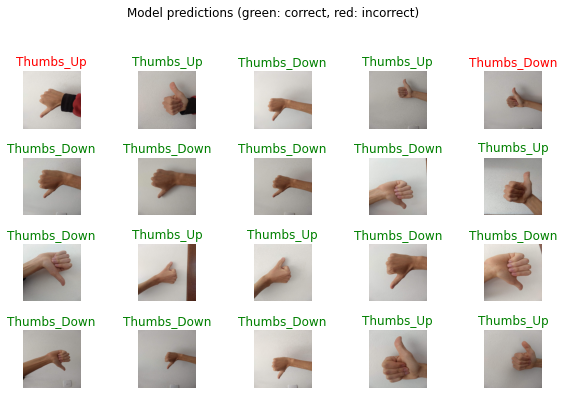

In [110]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range((len(predicted_labels)-4)):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = 'green' if predicted_ids[n] == true_label_ids[n] else 'red'
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle('Model predictions (green: correct, red: incorrect)')